## Observations and Insights 

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
meta = pd.read_csv(mouse_metadata_path)
results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data = meta.merge(results,on = 'Mouse ID')
# Display the data table for preview
data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [46]:
# Checking the number of mice.
len(data['Mouse ID'].unique())

249

In [36]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duprow = data[data.duplicated(['Mouse ID','Timepoint'])]
duprow

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [42]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dropindex = duprow.index
cdata = data.drop(dropindex,axis = 0)
cdata


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [45]:
# Checking the number of mice in the clean DataFrame.
len(cdata['Mouse ID'].unique())

249

## Summary Statistics

In [65]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
taverage = data['Tumor Volume (mm3)'].groupby(cdata['Drug Regimen']).mean()
tmedian = data['Tumor Volume (mm3)'].groupby(cdata['Drug Regimen']).median()
tstd = data['Tumor Volume (mm3)'].groupby(cdata['Drug Regimen']).std()
tvar = data['Tumor Volume (mm3)'].groupby(cdata['Drug Regimen']).var()
tsem = data['Tumor Volume (mm3)'].groupby(cdata['Drug Regimen']).sem()

stats = pd.DataFrame({
    'Average' : taverage,
    'Median':tmedian,
    'Standard Deviation':tstd,
    'Variance':tvar,
    'Standard Error':tsem})
stats
# This method is the most straighforward, creating multiple series and putting them all together at the end.


,Average,Median,Standard Deviation,Variance,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.393463,50.909965,6.568014,43.138803,0.525862
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar and Pie Charts

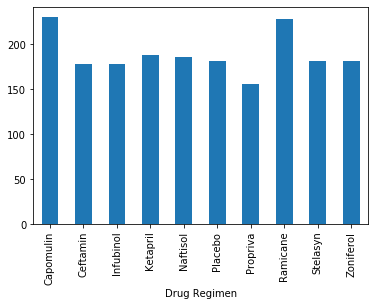

In [72]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
miceregime = data['Mouse ID'].groupby(cdata['Drug Regimen']).count()
miceregime.plot.bar()


<BarContainer object of 10 artists>

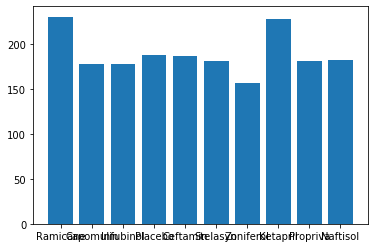

In [100]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = cdata['Drug Regimen'].unique()

plt.bar(x_axis, miceregime)


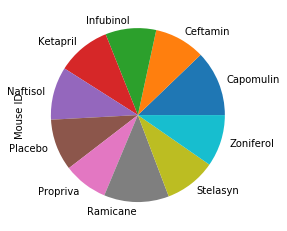

In [101]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
miceregime = data['Mouse ID'].groupby(cdata['Drug Regimen']).count()
miceregime.plot.pie()


([<matplotlib.patches.Wedge at 0x7fa8efac2190>,
 [Text(1.0204194928737198, 0.4107846863788144, ''),
  Text(0.5362052726346711, 0.9604602571677697, ''),
  Text(-0.09141333488814901, 1.0961950566412109, ''),
  Text(-0.702068627877636, 0.8468173603263065, ''),
  Text(-1.064081187039184, 0.2788032054860229, ''),
  Text(-1.0316298255570249, -0.38175895932012205, ''),
  Text(-0.6706052107628784, -0.8719453258649167, ''),
  Text(-0.01830287505144982, -1.0998477188978715, ''),
  Text(0.6778365030103217, -0.8663357750818895, ''),
  Text(1.0499413351770994, -0.32805973950872136, '')])

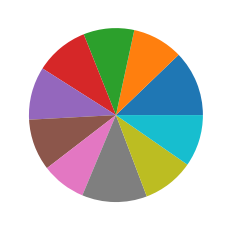

In [103]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
x_axis = cdata['Drug Regimen'].unique()

plt.pie(miceregime)


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
